In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
wordsList = np.load('/content/drive/MyDrive/wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('/content/drive/MyDrive/wordVectors.npy')
print ('Loaded the word vectors!')

Loaded the word list!
Loaded the word vectors!


In [3]:
print(len(wordsList))
print(wordVectors.shape)

400000
(400000, 50)


In [4]:
DemoIndex = wordsList.index('happy')
wordVectors[DemoIndex]

array([ 0.092086,  0.2571  , -0.58693 , -0.37029 ,  1.0828  , -0.55466 ,
       -0.78142 ,  0.58696 , -0.58714 ,  0.46318 , -0.11267 ,  0.2606  ,
       -0.26928 , -0.072466,  1.247   ,  0.30571 ,  0.56731 ,  0.30509 ,
       -0.050312, -0.64443 , -0.54513 ,  0.86429 ,  0.20914 ,  0.56334 ,
        1.1228  , -1.0516  , -0.78105 ,  0.29656 ,  0.7261  , -0.61392 ,
        2.4225  ,  1.0142  , -0.17753 ,  0.4147  , -0.12966 , -0.47064 ,
        0.3807  ,  0.16309 , -0.323   , -0.77899 , -0.42473 , -0.30826 ,
       -0.42242 ,  0.055069,  0.38267 ,  0.037415, -0.4302  , -0.39442 ,
        0.10511 ,  0.87286 ], dtype=float32)

In [5]:
import tensorflow as tf
maxSeqLength = 10 #Maximum length of sentence
numDimensions = 300 #Dimensions for each word vector
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("thought")
firstSentence[2] = wordsList.index("the")
firstSentence[3] = wordsList.index("movie")
firstSentence[4] = wordsList.index("was")
firstSentence[5] = wordsList.index("incredible")
firstSentence[6] = wordsList.index("and")
firstSentence[7] = wordsList.index("inspiring")
#firstSentence[8] and firstSentence[9] are going to be 0
print(firstSentence.shape)
print(firstSentence) #Shows the row index for each word

(10,)
[    41    804 201534   1005     15   7446      5  13767      0      0]


In [6]:
with tf.compat.v1.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors,firstSentence).eval().shape)

(10, 50)


In [7]:
from os import listdir
from os.path import isfile, join
positiveFiles = ['/content/drive/MyDrive/positiveReviews/' + f for f in listdir('/content/drive/MyDrive/positiveReviews/') if isfile(join('/content/drive/MyDrive/positiveReviews/', f))]
negativeFiles = ['/content/drive/MyDrive/negativeReviews/' + f for f in listdir('/content/drive/MyDrive/negativeReviews/') if isfile(join('/content/drive/MyDrive/negativeReviews/', f))]
numWords = []
for pf in positiveFiles:
    with open(pf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)       
print('Positive files finished')

for nf in negativeFiles:
    with open(nf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)  
print('Negative files finished')

numFiles = len(numWords)
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords)/len(numWords))

Positive files finished
Negative files finished
The total number of files is 25000
The total number of words in the files is 5844680
The average number of words in the files is 233.7872


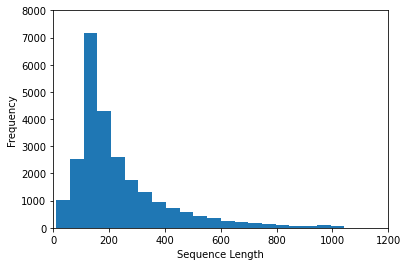

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 1200, 0, 8000])
plt.show()

In [9]:
maxSeqLength = 250

In [10]:
fname = positiveFiles[3] 
with open(fname) as f:
    for lines in f:
        print(lines)
        exit

This series adds new information and background to the book and includes personal appearances by the author and by archaeologists and other anthropologists. It brings the book to life and makes even more sense of the author's subsequent opus, *Collapse*.<br /><br />Diamond himself comes off as personable and caring, not just a disinterested or disengaged academic. This series makes it clear that his book was not just a response to a need to "publish or perish," as the saying goes about academe, but a deeply considered answer to a question from someone he respects, "Why you white people got so much cargo, and we have so little?" Because he respected the intelligence of the questioner and his community, Diamond looked for an answer that didn't insult that intelligence or that community. I like to think of his answer in a very simple way, in the same spirit as "South Park's" "Blame Canada": "Blame wheat!"


In [11]:
# Removes punctuation, parentheses, question marks, etc., and leaves only alphanumeric characters
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

In [12]:
firstFile = np.zeros((maxSeqLength), dtype='int32')
with open(fname) as f:
    indexCounter = 0
    line=f.readline()
    cleanedLine = cleanSentences(line)
    split = cleanedLine.split()
    for word in split:
        if indexCounter < maxSeqLength:
            try:
                firstFile[indexCounter] = wordsList.index(word)
            except ValueError:
                firstFile[indexCounter] = 399999 #Vector for unknown words
        indexCounter = indexCounter + 1
firstFile

array([    37,    281,   2144,     50,    419,      5,   2093,      4,
       201534,    539,      5,   1012,    894,   3033,     21, 201534,
         1715,      5,     21,  13988,      5,     68,  30703,     20,
         3998, 201534,    539,      4,    214,      5,    907,    151,
           56,   1380,      3, 201534,   4778,   3821,  19670,   2788,
         5188,    670,    934,    138,     19,  46163,      5,  11047,
           36,    120,      7,  51905,     46,  54481,   2815,     37,
          281,    907,     20,    706,     12,     26,    539,     15,
           36,    120,      7,   1153,      4,      7,    408,      4,
         6231,     46,  37748,     19, 201534,    345,   1432,     59,
        86866,     34,      7,   3601,    834,   2168,      4,      7,
          995,     25,   1318,     18,   9143,    738,     81,    298,
           69,    405,    100,    181,   3641,      5,     53,     33,
          100,    333,    113,     18,   5313, 201534,   1226,      3,
      

In [15]:
 ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
 fileCounter = 0
 for pf in positiveFiles:
    with open(pf, "r") as f:
        indexCounter = 0
        line=f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        for word in split:
            try:
                ids[fileCounter][indexCounter] = wordsList.index(word)
            except ValueError:
                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
            indexCounter = indexCounter + 1
            if indexCounter >= maxSeqLength:
                break
        fileCounter = fileCounter + 1 

 for nf in negativeFiles:
    with open(nf, "r") as f:
        indexCounter = 0
        line=f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        for word in split:
            try:
                ids[fileCounter][indexCounter] = wordsList.index(word)
            except ValueError:
                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
            indexCounter = indexCounter + 1
            if indexCounter >= maxSeqLength:
                break
        fileCounter = fileCounter + 1 
#Pass into embedding function and see if it evaluates. 
 np.save('idsMatrix', ids)

KeyboardInterrupt: ignored

In [ ]:
ids = np.load('idsMatrix.npy')

In [ ]:
from random import randint

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            num = randint(1,11499)
            labels.append([1,0])
        else:
            num = randint(13499,24999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(11499,13499)
        if (num <= 12499):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

In [ ]:
# RNN Model
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 100000

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.reset_default_graph()

labels = tf.compat.v1.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.compat.v1.placeholder(tf.int32, [batchSize, maxSeqLength])

In [ ]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

In [ ]:

lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

In [ ]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

In [ ]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [ ]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [ ]:
import datetime

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

In [ ]:
 sess = tf.InteractiveSession()
 saver = tf.train.Saver()
 sess.run(tf.global_variables_initializer())

 for i in range(iterations):
    #Next Batch of reviews
    nextBatch, nextBatchLabels = getTrainBatch();
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})
   
    #Write summary to Tensorboard
    if (i % 50 == 0):
        summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
        writer.add_summary(summary, i)

    #Save the network every 10,000 training iterations
    if (i % 10000 == 0 and i != 0):
        save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
        print("saved to %s" % save_path)
 writer.close()